In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Datos

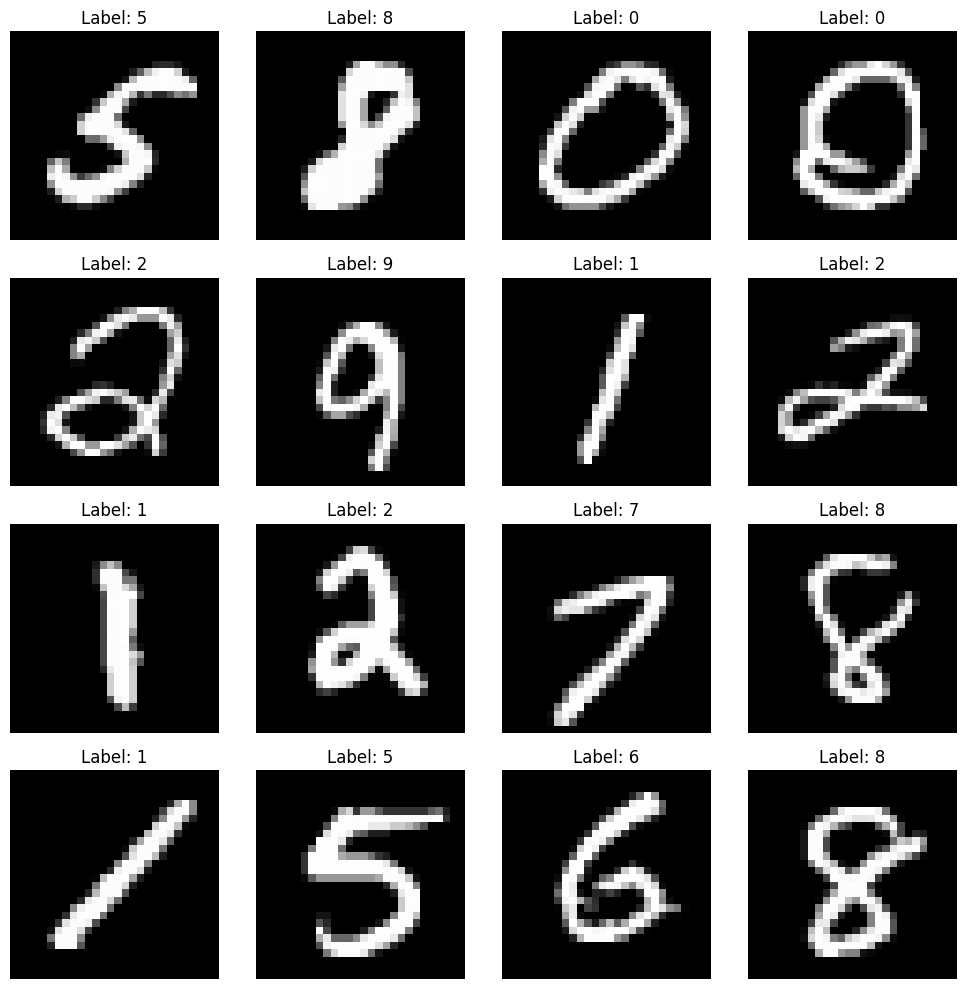

In [4]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [32]:

# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 200 neuronas
        self.fc1 = nn.Linear(28 * 28, 200)
        # Capa oculta: de 200 neuronas a 256 neuronas
        self.fc2 = nn.Linear(200, 256)
        # Capa de salida: de 256 neuronas a 10 clases (números del 0 al 9)
        self.fc3 = nn.Linear(256, 10)

        #self.fc4 = nn.Linear(10, 10) ensayo 3.

        # Función de activación ReLU
        self.relu = nn.ReLU()
        # Función de activación leakyReLU
        #self.leaky = nn.LeakyReLU()
        #Función de activación sigmoid.
        #self.sigmoid= nn.Sigmoid()

        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x =  self.relu(self.fc1(x))  # Aplicamos la primera capa y self.relu
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.relu(self.fc2(x))  # Aplicamos la segunda capa y self.relu
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc3(x)             # Aplicamos la capa de salida
        return x
    
        #x = self.relu(self.fc3(x))  # Aplicamos la tercera capa y ReLU ensayo 3. 
        #x = self.dropout(x)         # Aplicamos Dropout

# Entrenamiento

In [47]:
# Hiperparámetros
batch_size = 100       # Tamaño de lote
learning_rate = 0.001  # Tasa de aprendizaje
epochs = 15           # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam
#optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4) # Optimizador AdamW


# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")



Época [1/15], Pérdida: 0.2275
Época [2/15], Pérdida: 0.1648
Época [3/15], Pérdida: 0.1583
Época [4/15], Pérdida: 0.1399
Época [5/15], Pérdida: 0.0665
Época [6/15], Pérdida: 0.0465
Época [7/15], Pérdida: 0.1348
Época [8/15], Pérdida: 0.0457
Época [9/15], Pérdida: 0.1130
Época [10/15], Pérdida: 0.0978
Época [11/15], Pérdida: 0.1164
Época [12/15], Pérdida: 0.0626
Época [13/15], Pérdida: 0.0925
Época [14/15], Pérdida: 0.0442
Época [15/15], Pérdida: 0.1093


# Evaluación del modelo

In [48]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 97.83%


In [64]:
# Verificar si hay una GPU disponible, de lo contrario usar la CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Preprocesamiento: Definir transformaciones para los datos
transform = transforms.Compose([
    transforms.ToTensor(),                # Convertir imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizar los valores a un rango de [-1, 1]
])

# Cargar el conjunto de datos MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)  # Datos de entrenamiento
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)  # Datos de prueba

# Crear DataLoaders para manejar los datos de forma eficiente
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)   # Loader para entrenamiento (batch de 128, mezclado)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)    # Loader para prueba (batch de 128, sin mezclar)

class CNN(nn.Module):
    def __init__(self, verbose=False, filters_l1=32, filters_l2=64, dropout=0.2, final_layer_size=128): #(extra_layer_size=64): #se agrega extra_layer_size=64 en ensayo 3
        super(CNN, self).__init__()
        self.verbose = verbose
        self.filters_l1 = filters_l1
        self.filters_l2 = filters_l2
        self.dropout_rate = dropout
        self.final_layer_size = final_layer_size
        #self.extra_layer_size = extra_layer_size #se modifica en ensayo 3

        # Primera capa convolucional
        self.conv1 = nn.Conv2d(1, self.filters_l1, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Segunda capa convolucional
        self.conv2 = nn.Conv2d(self.filters_l1, self.filters_l2, kernel_size=3, stride=1, padding=1)

        # Calcular automáticamente las dimensiones de la capa lineal (fc1)
        self.fc1_input_size = self._calculate_fc1_input_size()
        
        # Primera capa completamente conectada
        self.fc1 = nn.Linear(self.fc1_input_size, self.final_layer_size) # Primera capa completamente conectada
        #self.fc2 = nn.Linear(self.final_layer_size, self.extra_layer_size)  # Nueva capa completamente conectada en ensayo 3
        self.dropout = nn.Dropout(self.dropout_rate)
        self.fc2 = nn.Linear(self.final_layer_size, 10)  # Capa de salida para 10 clases (MNIST)
        #self.fc3 = nn.Linear(self.extra_layer_size, 10)  # Capa de salida para 10 clases (MNIST) ensayo3


    def _calculate_fc1_input_size(self):
        """
        Calcula automáticamente el tamaño de la entrada para la primera capa completamente conectada (fc1).
        Simula una pasada con una imagen de prueba de tamaño (1, 28, 28).
        """
        with torch.no_grad():  # Desactiva gradientes
            x = torch.randn(1, 1, 28, 28)  # Tensor ficticio de entrada con tamaño MNIST (batch_size=1)
            x = self.pool(torch.relu(self.conv1(x)))  # Aplicar Conv1 -> Pool
            x = self.pool(torch.relu(self.conv2(x)))  # Aplicar Conv2 -> Pool
            fc1_input_size = x.numel()  # Calcular número total de elementos
        return fc1_input_size

    def forward(self, x):
        if self.verbose: 
            print(f"Entrada: {x.shape}")  # Imprime la dimensión de la entrada

        # Primera capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv1(x)))
        if self.verbose:
            print(f"Después de Conv1 y MaxPooling: {x.shape}")  # Dimensión después de Conv1 y Pool

        # Segunda capa convolucional, ReLU y MaxPooling
        x = self.pool(torch.relu(self.conv2(x)))
        if self.verbose:
            print(f"Después de Conv2 y MaxPooling: {x.shape}")  # Dimensión después de Conv2 y Pool

        # Aplanar las características 2D a 1D
        x = x.view(-1, self.fc1_input_size)
        if self.verbose:
            print(f"Después de Aplanamiento: {x.shape}")  # Dimensión después de Flatten

        # Primera capa completamente conectada
        x = torch.relu(self.fc1(x))
        if self.verbose:
            print(f"Después de Fully Connected (fc1): {x.shape}")  # Dimensión después de fc1

        # Segunda capa completamente conectada de ensayo 3
        #x = torch.relu(self.fc2(x))
        #if self.verbose:
            #print(f"Después de Fully Connected (fc2): {x.shape}")  # Dimensión después de fc2 de ensayo3

        # Aplicar Dropout
        x = self.dropout(x)
        if self.verbose:
            print(f"Después de Dropout: {x.shape}")  # Dimensión después de Dropout

        # Capa de salida
        x = self.fc2(x)
        if self.verbose:
            print(f"Después de Fully Connected (fc2): {x.shape}")  # Dimensión después de fc2 (salida final)


        # Capa de salida ensayo3
        #x = self.fc3(x) #modificado al agregar capa lineal ensayo3
        #if self.verbose:
            #print(f"Después de Fully Connected (fc3): {x.shape}")  # Dimensión después de fc3 (salida final) #modificado al agregar capa lineal

        return x



In [70]:
# Inicializar el modelo, la función de pérdida y el optimizador
model = CNN(verbose=False, filters_l1=8, filters_l2=32, dropout=0.2, final_layer_size=128).to(device)                             # Mover el modelo a la GPU/CPU
criterion = nn.CrossEntropyLoss()                    # Función de pérdida para clasificación multiclase
# Configurar el optimizador AdamW
#learning_rate = 0.001  # Tasa de aprendizaje
#weight_decay = 1e-4    # Parámetro de regularización L2
#optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)  # Optimizador AdamW
#optimizer = optim.RMSprop(model.parameters(), lr=0.001) # Optimizador RMSprop con tasa de aprendizaje 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizador Adam con tasa de aprendizaje 0.001
#optimizer = optim.Adam(model.parameters(), lr=0.01) # Optimizador Adam con tasa de aprendizaje 0.01

# Definir la función de entrenamiento
def train(model, loader, criterion, optimizer, device):
    model.train()  # Establecer el modelo en modo de entrenamiento
    running_loss = 0.0
    for images, labels in loader:  # Iterar sobre los lotes de datos
        images, labels = images.to(device), labels.to(device)  # Mover los datos a la GPU/CPU

        optimizer.zero_grad()       # Reiniciar los gradientes
        outputs = model(images)     # Paso hacia adelante
        loss = criterion(outputs, labels)  # Calcular la pérdida
        loss.backward()             # Paso hacia atrás (cálculo de gradientes)
        optimizer.step()            # Actualizar los pesos

        running_loss += loss.item()  # Acumular la pérdida
    return running_loss / len(loader)  # Devolver la pérdida promedio

# Definir la función de evaluación
def evaluate(model, loader, device):
    model.eval()  # Establecer el modelo en modo de evaluación
    correct = 0
    total = 0
    with torch.no_grad():  # Deshabilitar el cálculo de gradientes para ahorrar memoria
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # Mover datos a la GPU/CPU
            outputs = model(images)  # Paso hacia adelante
            _, predicted = torch.max(outputs, 1)  # Obtener las predicciones (clase con mayor probabilidad)
            total += labels.size(0)  # Contar el número total de ejemplos
            correct += (predicted == labels).sum().item()  # Contar las predicciones correctas
    return correct / total  # Calcular la precisión

# Bucle principal de entrenamiento
num_epochs = 10  # Número de épocas
for epoch in range(num_epochs):
    # Entrenar el modelo y calcular la pérdida
    train_loss = train(model, train_loader, criterion, optimizer, device)
    # Evaluar el modelo en el conjunto de prueba
    test_accuracy = evaluate(model, test_loader, device)
    # Imprimir los resultados de la época actual
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Calcular la precisión final en el conjunto de prueba
final_accuracy = evaluate(model, test_loader, device)
print(f"Final Test Accuracy: {final_accuracy:.4f}")


Epoch [1/10], Loss: 0.3848, Test Accuracy: 0.9711
Epoch [2/10], Loss: 0.0975, Test Accuracy: 0.9820
Epoch [3/10], Loss: 0.0682, Test Accuracy: 0.9858
Epoch [4/10], Loss: 0.0562, Test Accuracy: 0.9866
Epoch [5/10], Loss: 0.0454, Test Accuracy: 0.9878
Epoch [6/10], Loss: 0.0391, Test Accuracy: 0.9851
Epoch [7/10], Loss: 0.0344, Test Accuracy: 0.9892
Epoch [8/10], Loss: 0.0296, Test Accuracy: 0.9889
Epoch [9/10], Loss: 0.0273, Test Accuracy: 0.9904
Epoch [10/10], Loss: 0.0256, Test Accuracy: 0.9888
Final Test Accuracy: 0.9888


#Para detalles de cada ensayo, revisar docuemnto word. 

Conclusión perceptrón multicapa: La mejor configuración fue el ensayo 1, 2 capas ocultas con n° de neuronas 200/256/10, función de activación ReLU y accuracy de 97.67%, presenta equilibrio entre precisión y eficiencia. Reducir la cantidad de neuronas o agregar una tercera capa , disminuyó el desempeño del modelo a los valores mas bajos del ensayo. Modificar funciones de activación a Leaky ReLU tuvo buen rendieminto pero en un mayor tiempo, mientras que la función sigmoide tiene menos capacidad de aprendizaje similar a las de ReLU con menos neuronas. 

Conclusión redes convolucionales: La mejor combinación a modo de conclusión de estructura para es:  filtros (8, 32), dropout: 0.2 y capas luego de convolución=128. Teniendo buena capacidad para procesar, sin mayor esfuerzo de computador, al ser un entrenamiento es más rápido y tiene menos probabilidades de sobreajuste. Aumentar N° de filtro o neuronas, no presenta una mejora importante y ambos casos aumenta tiempo, por ende, se descarta. Aumentar dropout empeoró la precisión, la regularización extrema, afecta negativamente. El mejor rendimiento se obtuvo con el optimizador RMSprop con tasa de aprendizaje de 0.001, luego sigue el optimizador ADAm, aunque AdamW no presenta grandes mejoras, igual anda bien. Se evidencia que altas tasas de aprendizaje tienen como resultado un bajo desempeño. 
